 # The Ground State Energy of Lithium Hydride (LiH)
 

In [25]:
import numpy as np
from qiskit_aqua_chemistry import AquaChemistry
from qiskit_qcgpu_provider import QCGPUProvider

In [2]:
aqua_chemistry_dict = {
  "driver": { "name": "PYSCF" },
  "PYSCF": { "atom": "", "basis": "sto3g" },
  "operator": {
    "name": "hamiltonian",
    "qubit_mapping": "parity",
    "two_qubit_reduction": True,
    "freeze_core": True,
    "orbital_reduction": [-3, -2]
  },
  "algorithm": { "name": "VQE" },
  "optimizer": { "name": "COBYLA", "maxiter": 500 },
  "variational_form": { "name": "UCCSD" },
  "initial_state": { "name": "HartreeFock" }
}
# tested molecular, LiH
molecule = "H .0 .0 -{0}; Li .0 .0 {0}"

In [3]:
pts  = [x * 0.1  for x in range(6, 20)]
pts += [x * 0.25 for x in range(8, 16)]
pts += [4.0]
energies = np.empty(len(pts))
distances = np.empty(len(pts))
dipoles = np.empty(len(pts))

backend = QCGPUProvider().get_backend('statevector_simulator')

print('Processing step __', end='')
for i, d in enumerate(pts):
  print('\b\b{:2d}'.format(i), end='', flush=True)
  aqua_chemistry_dict["PYSCF"]["atom"] = molecule.format(d/2)
  solver = AquaChemistry()
  result = solver.run(aqua_chemistry_dict)
  energies[i] = result["energy"]
  dipoles[i] = result["total_dipole_moment"] / 0.393430307
  distances[i] = d

for j in range(len(distances)):
  print("{:0.2f}: Energy={:0.8f}, Dipole={:0.5f}".format(distances[j], energies[j], dipoles[j]))
              

Processing step 220.60: Energy=-7.31334581, Dipole=5.34806
0.70: Energy=-7.50092208, Dipole=5.05438
0.80: Energy=-7.63097824, Dipole=4.89155
0.90: Energy=-7.72081240, Dipole=4.80825
1.00: Energy=-7.78224239, Dipole=4.76433
1.10: Energy=-7.82359926, Dipole=4.73807
1.20: Energy=-7.85069837, Dipole=4.71902
1.30: Energy=-7.86756328, Dipole=4.70347
1.40: Energy=-7.87700147, Dipole=4.69212
1.50: Energy=-7.88101569, Dipole=4.67978
1.60: Energy=-7.88107204, Dipole=4.66675
1.70: Energy=-7.87826814, Dipole=4.64977
1.80: Energy=-7.87344029, Dipole=4.62520
1.90: Energy=-7.86723395, Dipole=4.58683
2.00: Energy=-7.86015317, Dipole=4.52695
2.25: Energy=-7.84104270, Dipole=4.24423
2.50: Energy=-7.82307661, Dipole=3.69306
2.75: Energy=-7.80861234, Dipole=2.87945
3.00: Energy=-7.79836339, Dipole=2.00092
3.25: Energy=-7.79175296, Dipole=1.27204
3.50: Energy=-7.78771692, Dipole=0.77325
3.75: Energy=-7.78531632, Dipole=0.45228
4.00: Energy=-7.78391451, Dipole=0.26049


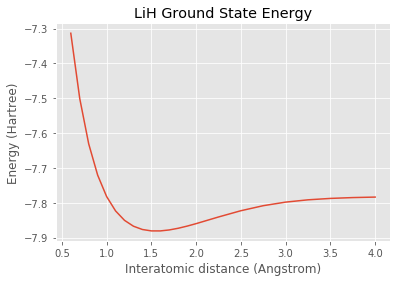

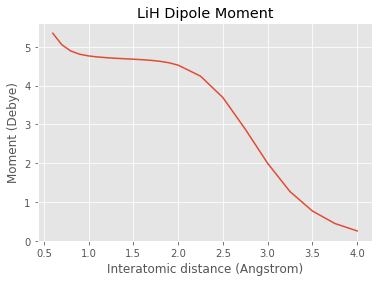

In [49]:
plot_data(distances, energies, dipoles)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_data(distances, energies, dipoles):
    plt.plot(distances, energies, label='Computed')
    plt.xlabel('Interatomic distance (Angstrom)')
    plt.ylabel('Energy (Hartree)')
    plt.title('LiH Ground State Energy')
    plt.show()
    
    plt.plot(distances, dipoles, label='Computed')
    plt.xlabel('Interatomic distance (Angstrom)')
    plt.ylabel('Moment (Debye)')
    plt.title('LiH Dipole Moment')
    plt.show()
